# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "./train.p"
testing_file = "./test.p"

validation_file= "./valid.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

print("X_valid shape", X_valid.shape)
print("y_valid shape", y_valid.shape)

X_train shape (34799, 32, 32, 3)
y_train shape (34799,)
X_test shape (12630, 32, 32, 3)
y_test shape (12630,)
X_valid shape (4410, 32, 32, 3)
y_valid shape (4410,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

n_train = len(X_train)

n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

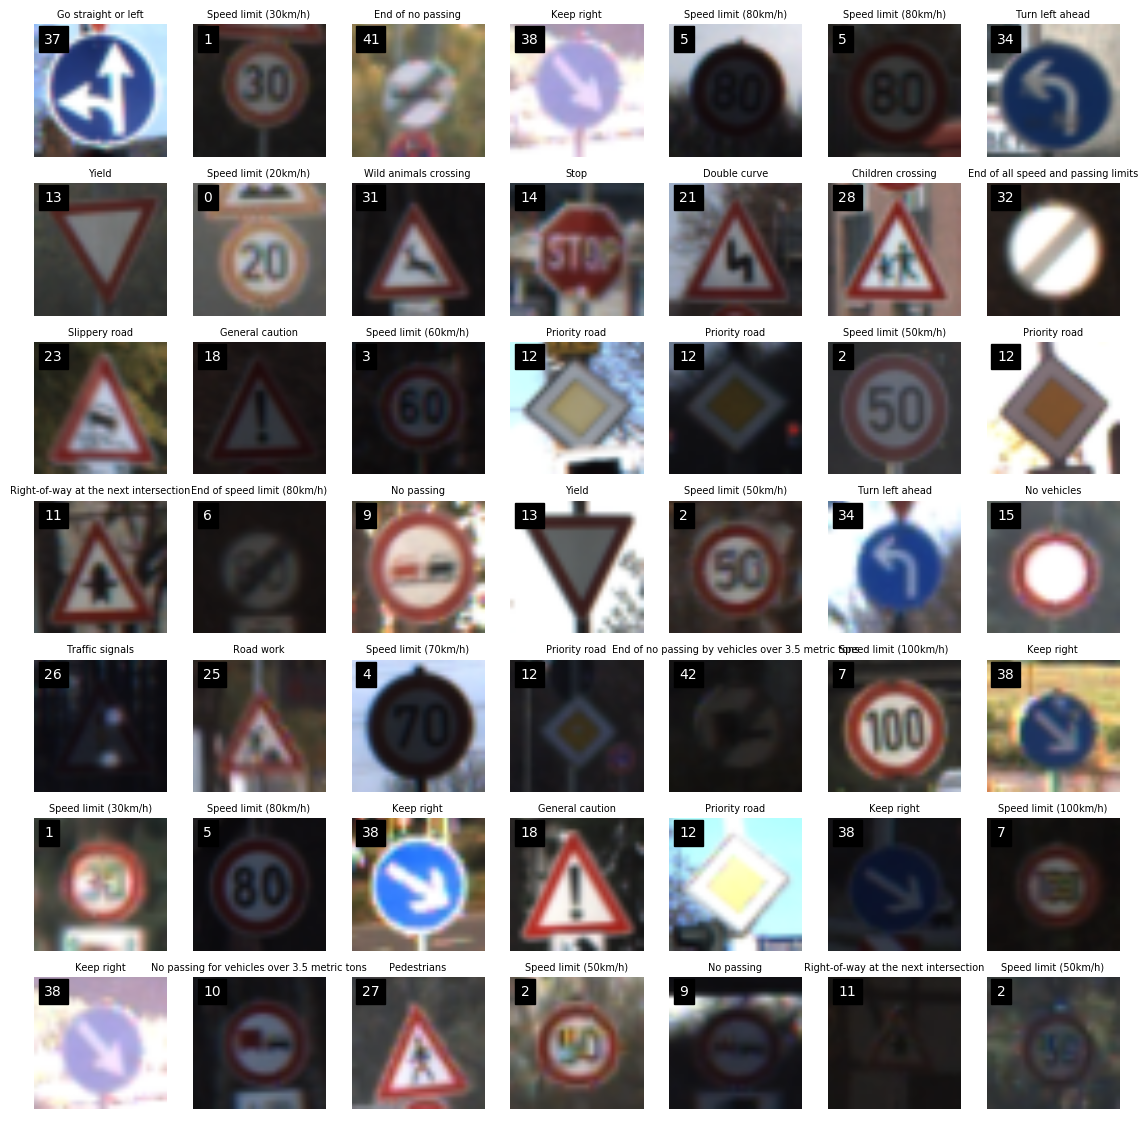

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

sign_names = pd.read_csv('signnames.csv')
y_labels = sign_names['SignName']

#visualize random images in a 7 x 7 grid
r = 7
c = 7
plt_figure, plt_axis = plt.subplots(r, c, figsize=(14, 14))
plt_figure.subplots_adjust(hspace = 0.2)
plt_axis = plt_axis.flatten()
for i in range(r*c):
    image_index = np.random.randint(0,len(y_train))
    plt_axis[i].imshow(X_train[image_index])
    plt_axis[i].text(2, 4,str(y_train[image_index]), bbox={'facecolor' : 'black'}, color='white')
    plt_axis[i].set_title(y_labels[y_train[image_index]], fontsize=7)
    plt_axis[i].axis('off')

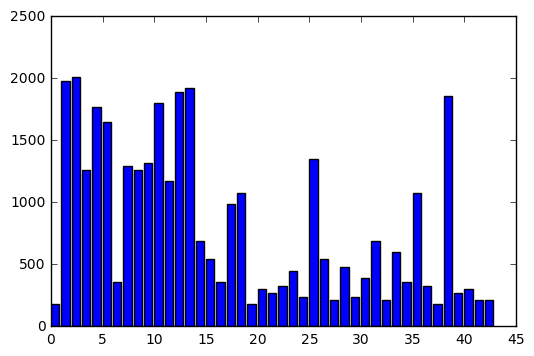

Class  Frequency                                              Label
    2       2010                               Speed limit (50km/h)
    1       1980                               Speed limit (30km/h)
   13       1920                                              Yield
   12       1890                                      Priority road
   38       1860                                         Keep right
   10       1800       No passing for vehicles over 3.5 metric tons
    4       1770                               Speed limit (70km/h)
    5       1650                               Speed limit (80km/h)
   25       1350                                          Road work
    9       1320                                         No passing
    7       1290                              Speed limit (100km/h)
    3       1260                               Speed limit (60km/h)
    8       1260                              Speed limit (120km/h)
   11       1170              Right-of-way at th

In [4]:
#visualize the distribution
bin_counts = [y_train.tolist().count(class_id) for class_id in range(n_classes)]
plt.bar(range(n_classes), bin_counts)
plt.show()

bin_counts_desc = pd.DataFrame({'Class' : range(n_classes), 
                    'Label' : y_labels, 
                    'Frequency' : bin_counts }).sort_values(['Frequency'], ascending=False)
print(bin_counts_desc.to_string(index=False))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

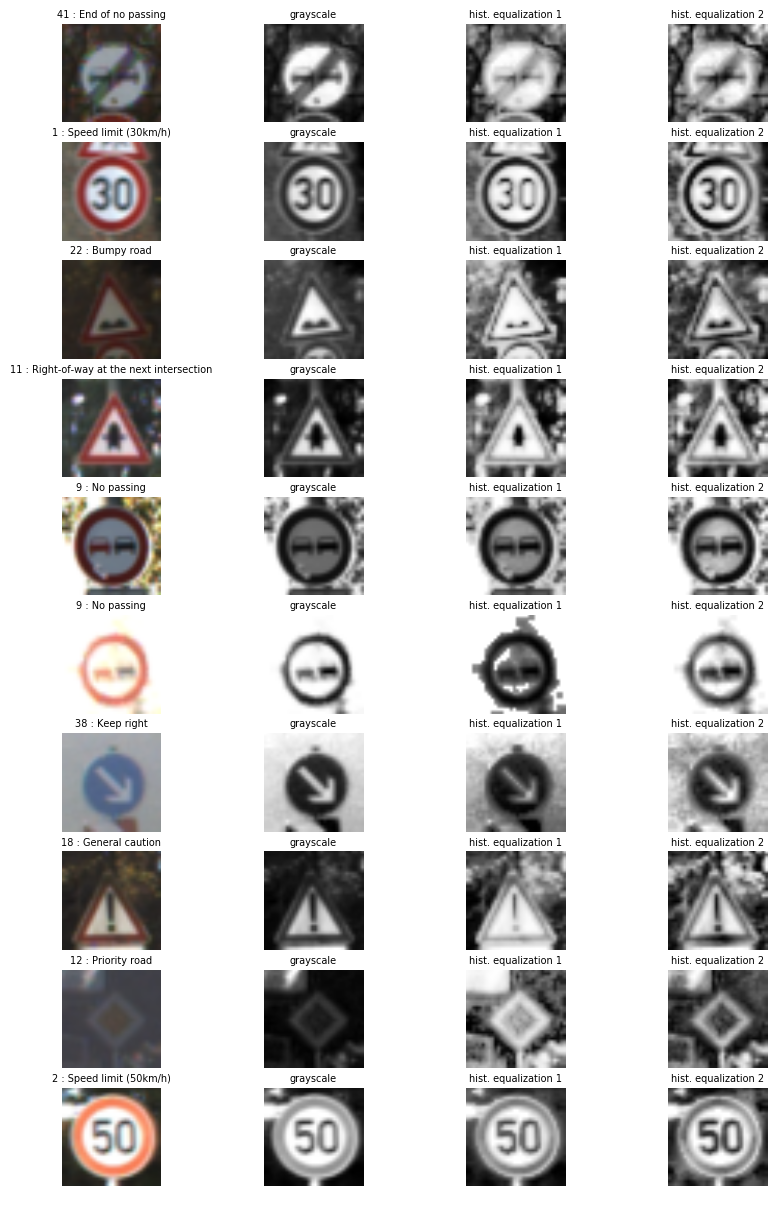

In [5]:
#pre-process image
import cv2
import random

X_train_updated = []
y_train_updated = []

n_debug = 10
debug_images = []
debug_classes = []
debug_indexes = set(random.sample(range(n_train), n_debug))

clahe = cv2.createCLAHE(clipLimit=11.0, tileGridSize=(3,3))
for image_index in range(n_train):    
    rgb_image = X_train[image_index]
    
    #convert to gray-scale
    grayscale_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    
    #apply histogram equilization to compensate for diffrent brightness
    hist_equaliized_image1 = cv2.equalizeHist(grayscale_image)

    #apply adaptive histogram equilization to compensate for diffrent brightness
    hist_equaliized_image2 = clahe.apply(grayscale_image)

    if image_index in debug_indexes:
        #print(image_index)
        debug_images.append(rgb_image)
        debug_images.append(grayscale_image)
        debug_images.append(hist_equaliized_image1)
        debug_images.append(hist_equaliized_image2)
        debug_classes.append(y_train[image_index])

    X_train_updated.append(hist_equaliized_image2)
    y_train_updated.append(y_train[image_index])

r = n_debug
c = 4
plt_figure, plt_axis = plt.subplots(r, c, figsize=(10, 15))
plt_figure.subplots_adjust(hspace = 0.2)
plt_axis = plt_axis.flatten()

idx = 0
for i in range(0, r*c, c):
    plt_axis[i].imshow(debug_images[i])
    plt_axis[i].set_title(str(debug_classes[idx])  + ' : ' + y_labels[debug_classes[idx]], fontsize=7)
    plt_axis[i].axis('off')    
    
    plt_axis[i+1].imshow(debug_images[i+1], cmap="gray")
    plt_axis[i+1].set_title('grayscale', fontsize=7)
    plt_axis[i+1].axis('off')    

    plt_axis[i+2].imshow(debug_images[i+2], cmap="gray")
    plt_axis[i+2].set_title('hist. equalization 1', fontsize=7)
    plt_axis[i+2].axis('off')

    plt_axis[i+3].imshow(debug_images[i+3], cmap="gray")
    plt_axis[i+3].set_title('hist. equalization 2', fontsize=7)
    plt_axis[i+3].axis('off')

    idx += 1
plt.show()

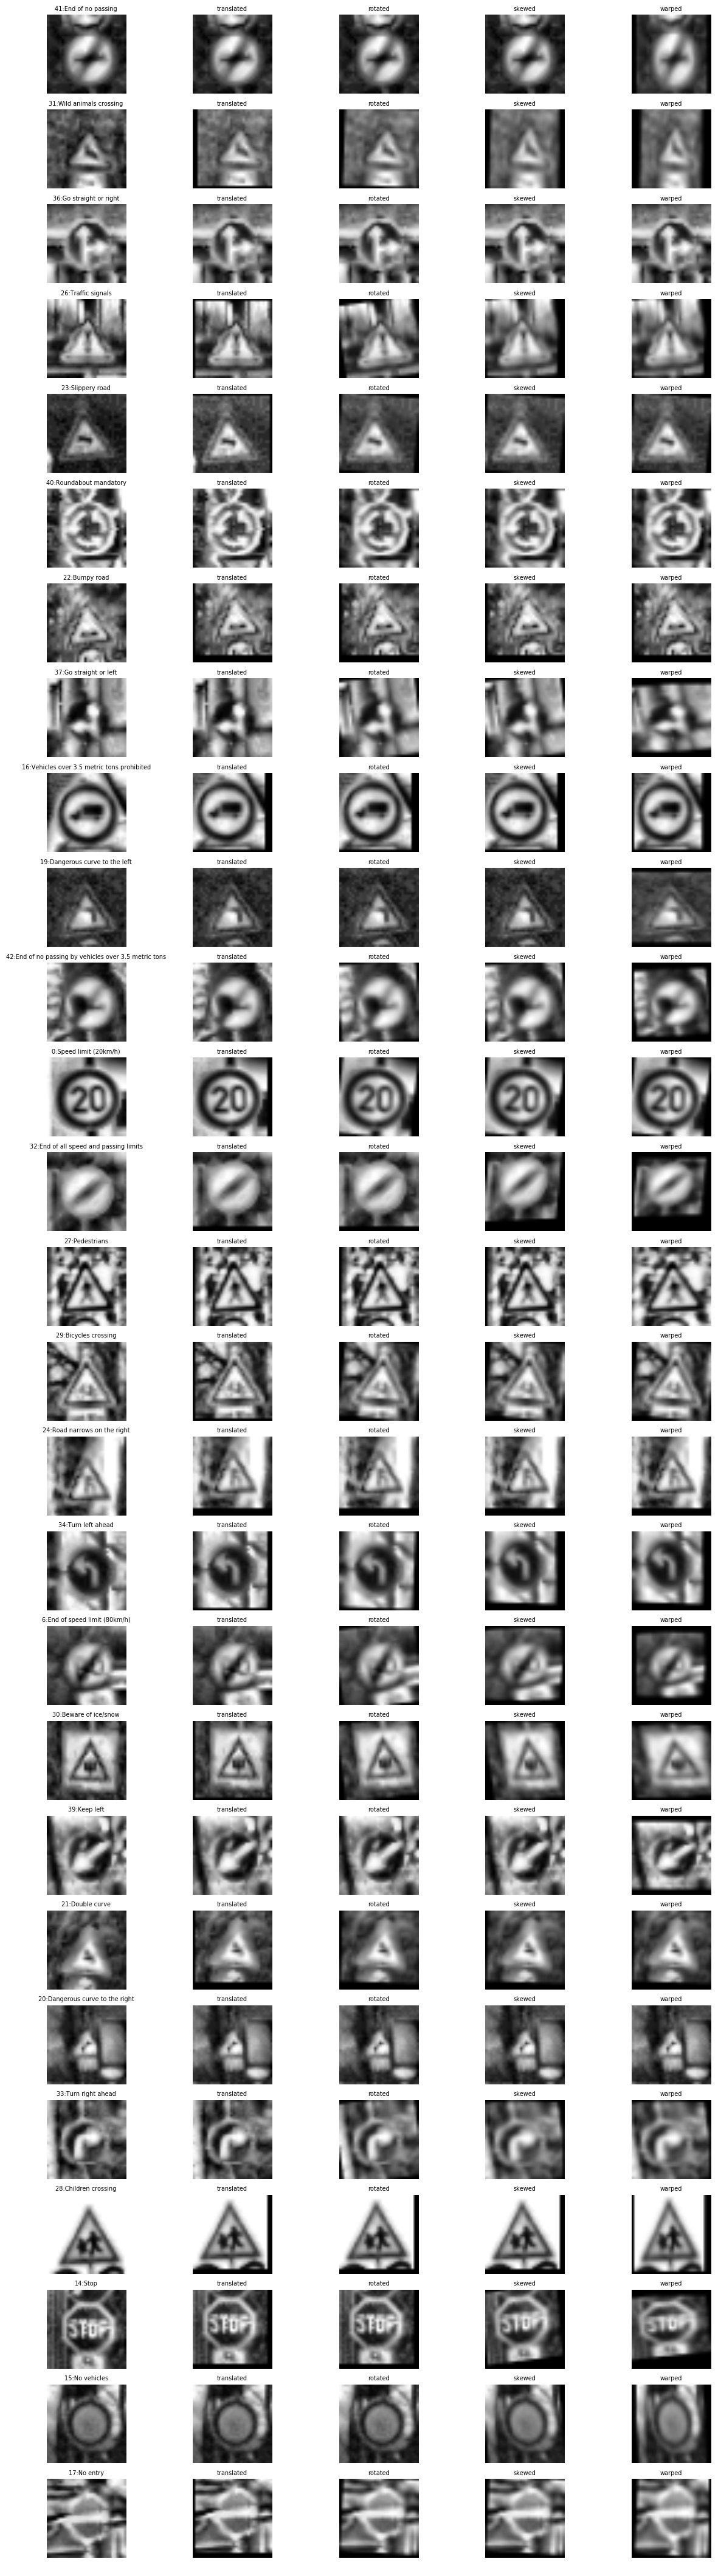

In [6]:
#determine which classes need to be augmented and how many times
MIN_SAMPLES = 1000
augmentation_multiplier = []
for class_index in range(len(bin_counts)):
    class_multiplier = MIN_SAMPLES//bin_counts[class_index]
    augmentation_multiplier.append(class_multiplier)
    #print(class_index, bin_counts[class_index], class_multiplier)


#select random image indexes from non-zero classes to visualize the augmented images
#debug_classes = (np.nonzero(augmentation_multiplier)[0]).tolist()
#for dc in debug_classes:
#    class_indexes = [ci for ci,cv in enumerate(y_train_updated) if cv == dc ]
#    debug_indexes.append(random.choice(class_indexes))

#agument images
debug_images = []
debug_classes = []
augmention_classes = (np.nonzero(augmentation_multiplier)[0]).tolist()

X_train_augmented = []
y_train_augmented = []
for image_index in range(len(X_train_updated)):
    image_class = y_train_updated[image_index]
    class_multiplier = augmentation_multiplier[image_class]
    for i in range(0, class_multiplier, 1):                         
        original_image = X_train_updated[image_index]
        rows, cols = original_image.shape
                
        #translate
        translated_image = original_image
        if (random.choice([True, False])):
            translate_M = np.float32([[1, 0, random.randrange(-3, 3)], [0, 1, random.randrange(-3, 3)]])
            translated_image = cv2.warpAffine(translated_image, translate_M, (rows, cols))
                         
        #rotate
        rotated_image = translated_image
        if (random.choice([True, False])):
            rotate_M = cv2.getRotationMatrix2D((cols/2,rows/2),random.randrange(-9, 9),1)
            rotated_image = cv2.warpAffine(rotated_image, rotate_M, (rows, cols))            
        
        #skew
        skewed_image = rotated_image
        if (random.choice([True, False])):
            pts1 = np.float32([[4,4], 
                               [27, 4], 
                               [4, 27]])
            pts2 = np.float32([[4 + random.randrange(-2, 2),4 + random.randrange(-2, 2)], 
                               [27 + random.randrange(-2, 2), 4 + random.randrange(-2, 2)], 
                               [4 + random.randrange(-2, 2), 27 + random.randrange(-2, 2)]])
            skew_M = cv2.getAffineTransform(pts1,pts2)
            skewed_image = cv2.warpAffine(skewed_image, skew_M, (rows,cols))

        #warp
        warped_image = skewed_image
        if (random.choice([True, False])):
            px, py = np.random.randint(-3, 3, 2)
            pts1 = np.float32([[px, py], [rows-px, py], [rows-px, cols-py], [px, cols-py]])
            pts2 = np.float32([[0, 0], [rows, 0], [rows, cols], [0, cols]])
            warp_M = cv2.getPerspectiveTransform(pts1,pts2)
            warped_image = cv2.warpPerspective(warped_image, warp_M, (rows, cols))
            
        X_train_augmented.append(warped_image)
        y_train_augmented.append(image_class)
                         
        #if i == 0 and image_index in debug_indexes:
        if i == 0 and image_class not in debug_classes:
            debug_classes.append(image_class)
            debug_images.append(original_image)
            debug_images.append(translated_image)
            debug_images.append(rotated_image)
            debug_images.append(skewed_image)         
            debug_images.append(warped_image)         
        
idx = 0
n_debug = len(debug_classes)               

plt_figure, plt_axis = plt.subplots(n_debug, 5, figsize=(5*3, n_debug*2))
plt_figure.subplots_adjust(hspace = 0.2)
plt_axis = plt_axis.flatten()

for i in range(0, n_debug*5, 5):
    plt_axis[i].imshow(debug_images[i], cmap="gray")
    plt_axis[i].set_title(str(debug_classes[idx]) + ':' + y_labels[debug_classes[idx]] , fontsize=7)
    plt_axis[i].axis('off')    

    plt_axis[i+1].imshow(debug_images[i+1], cmap="gray")
    plt_axis[i+1].set_title('translated', fontsize=7)
    plt_axis[i+1].axis('off')    

    plt_axis[i+2].imshow(debug_images[i+2], cmap="gray")
    plt_axis[i+2].set_title('rotated', fontsize=7)
    plt_axis[i+2].axis('off')

    plt_axis[i+3].imshow(debug_images[i+3], cmap="gray")
    plt_axis[i+3].set_title('skewed', fontsize=7)
    plt_axis[i+3].axis('off')
    
    plt_axis[i+4].imshow(debug_images[i+4], cmap="gray")
    plt_axis[i+4].set_title('warped', fontsize=7)
    plt_axis[i+4].axis('off')

    idx += 1

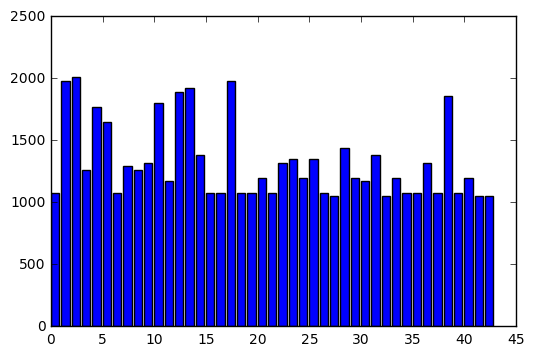

Class  Frequency                                              Label
    2       2010                               Speed limit (50km/h)
    1       1980                               Speed limit (30km/h)
   17       1980                                           No entry
   13       1920                                              Yield
   12       1890                                      Priority road
   38       1860                                         Keep right
   10       1800       No passing for vehicles over 3.5 metric tons
    4       1770                               Speed limit (70km/h)
    5       1650                               Speed limit (80km/h)
   28       1440                                  Children crossing
   14       1380                                               Stop
   31       1380                              Wild animals crossing
   23       1350                                      Slippery road
   25       1350                                

In [7]:
#merge the augmented images and visualize the distributions
X_train_updated.extend(X_train_augmented)
y_train_updated.extend(y_train_augmented)

bin_counts = [y_train_updated.count(class_id) for class_id in range(n_classes)]
plt.bar(range(n_classes), bin_counts)
plt.show()

bin_counts_desc = pd.DataFrame({'Class' : range(n_classes), 
                    'Label' : y_labels, 
                    'Frequency' : bin_counts }).sort_values(['Frequency'], ascending=False)
print(bin_counts_desc.to_string(index=False))

#normalize the training images to (-1, 1)
X_train_normalized = (np.array(X_train_updated, dtype=np.float32) - 128)/128
print("Training dataset mean, min, max after normalizing : ", 
      np.mean(X_train_normalized), 
      np.min(X_train_normalized), 
      np.max(X_train_normalized))

#convert y_train_updated to numpy array 
y_train_normalized = np.array(y_train_updated)

from numpy import newaxis

#reshape X_train_normalized for conv. layer
X_train_normalized = X_train_normalized[..., newaxis]

print("X_train shape", X_train_normalized.shape)
print("y_train shape", y_train_normalized.shape)

In [8]:
#update the grayscale conversion, histogram equilization and normalization to testing and validation images
X_test_updated = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_test])
X_test_updated = np.array([clahe.apply(image) for image in X_test_updated])
X_test_normalized = (np.array(X_test_updated, dtype=np.float32) - 128)/128

print("Testing dataset mean, min, max after normalizing : ", 
      np.mean(X_test_normalized), 
      np.min(X_test_normalized), 
      np.max(X_test_normalized))

X_valid_updated = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_valid])
X_valid_updated = np.array([clahe.apply(image) for image in X_valid_updated])
X_valid_normalized = (np.array(X_valid_updated, dtype=np.float32) - 128)/128

print("Validation dataset mean, min, max after normalizing : ", 
      np.mean(X_valid_normalized), 
      np.min(X_valid_normalized), 
      np.max(X_valid_normalized))

y_test_normalized = np.array(y_test)
y_valid_normalized = np.array(y_valid)


#reshape X_test_normalized, X_valid_normalized for NN evaluation
X_test_normalized = X_test_normalized[..., newaxis]
X_valid_normalized = X_valid_normalized[..., newaxis]

print("X_test shape", X_test_normalized.shape)
print("X_valid shape", X_valid_normalized.shape)
print("y_test shape", y_test_normalized.shape)
print("y_valid shape", y_test_normalized.shape)

Testing dataset mean, min, max after normalizing :  -0.0848068 -0.992188 0.992188
Validation dataset mean, min, max after normalizing :  -0.0900531 -0.992188 0.992188
X_test shape (12630, 32, 32, 1)
X_valid shape (4410, 32, 32, 1)
y_test shape (12630,)
y_valid shape (12630,)


### Model Architecture

In [9]:
#Start with basic LeNet Architecture from the Lessons lab

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    l1_output_size = 6
    l1_output_shape = (5, 5, 1, l1_output_size)
    
    l2_output_size = 16
    l2_output_shape = (5, 5, l1_output_size, l2_output_size)
    
    l3_output_size = 120
    l3_output_shape = (400, l3_output_size)
    
    l4_output_size = 84
    l4_output_shape = (l3_output_size, l4_output_size)

    l5_output_size = 43
    l5_output_shape = (l4_output_size, l5_output_size)

    #Layer 1: Convolution
    conv1_W = tf.Variable(tf.truncated_normal(shape = l1_output_shape, mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(l1_output_size))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding='VALID') + conv1_b
    #Layer 1: Activation
    conv1 = tf.nn.relu(conv1) 
    #Layer 1: Pooling
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolution
    conv2_W = tf.Variable(tf.truncated_normal(shape = l2_output_shape, mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(l2_output_size))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding='VALID') + conv2_b
    #Layer 2: Activation
    conv2 = tf.nn.relu(conv2) 
    #Layer 2: Pooling
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    #Flatten
    fc0 = flatten(conv2)
    fc0_dropout = tf.nn.dropout(fc0, 0.75)
    
    #Layer 3: Fully Connected
    fc1_W = tf.Variable(tf.truncated_normal(shape=l3_output_shape, mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(l3_output_size))
    fc1   = tf.matmul(fc0_dropout, fc1_W) + fc1_b
    #Layer 3: Activation.
    fc1    = tf.nn.relu(fc1)

    #Layer 4: Fully Connected
    fc2_W  = tf.Variable(tf.truncated_normal(shape=l4_output_shape, mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(l4_output_size))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    #Layer 4: Activation.
    fc2    = tf.nn.relu(fc2)

    #Layer 5: Fully Connected
    fc3_W  = tf.Variable(tf.truncated_normal(shape=l5_output_shape, mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(l5_output_size))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [10]:
#A Multi-Scale Conv Neural Net Architecture by Pierre Sermanet and Yann LeCun
#http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def MultiScaleConvNet(x):
    mu = 0
    sigma = 0.1
    
    l1_output_size = 32
    l1_output_shape = (5, 5, 1, l1_output_size)
    
    l2_output_size = 64
    l2_output_shape = (5, 5, l1_output_size, l2_output_size)
    
    l3_output_size = 1600
    l3_output_shape = (5, 5, l2_output_size, l3_output_size)
    
    l4_output_size = 43
    l4_output_shape = (l3_output_size*2, l4_output_size)

    #l5_output_size = 43
    #l5_output_shape = (l4_output_size, l5_output_size)

    #Layer 1: Convolution
    conv1_W = tf.Variable(tf.truncated_normal(shape = l1_output_shape, mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(l1_output_size))
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1, 1, 1, 1], padding='VALID') + conv1_b
    #Layer 1: Activation
    conv1 = tf.nn.relu(conv1) 
    #Layer 1: Pooling
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolution
    conv2_W = tf.Variable(tf.truncated_normal(shape = l2_output_shape, mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(l2_output_size))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides = [1, 1, 1, 1], padding='VALID') + conv2_b
    #Layer 2: Activation
    conv2 = tf.nn.relu(conv2) 
    #Layer 2: Pooling
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
   
    #Layer 3: Convolutional
    conv3_W = tf.Variable(tf.truncated_normal(shape = l3_output_shape, mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(l3_output_size))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b                     
    # Layer 3: Activation.
    conv3 = tf.nn.relu(conv3)

    # Flatten Layer 2
    flat_l2 = flatten(conv2)
    
    # Flatten Layer 3
    flat_l3 = flatten(conv3)

    #Concat flattened layer 2 and layer 3
    fc0 = tf.concat([flat_l3, flat_l2], 1)    
    # Dropout
    fc0_dropout = tf.nn.dropout(fc0, 0.5)
    
    #Layer 4: Fully Connected
    fc1_W = tf.Variable(tf.truncated_normal(shape = l4_output_shape, mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(l4_output_size))    
    logits = tf.matmul(fc0_dropout, fc1_W) + fc1_b
    #fc1   = tf.matmul(fc0_dropout, fc1_W) + fc1_b
    #Layer 4: Activation.
    #fc1    = tf.nn.relu(fc1)

    #Layer 5: Fully Connected
    #fc2_W  = tf.Variable(tf.truncated_normal(shape=l5_output_shape, mean = mu, stddev = sigma))
    #fc2_b  = tf.Variable(tf.zeros(l5_output_size))
    #logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

### Train, Validate and Test the Model

In [11]:
#Setup the Training Pipeline
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.0009

#logits = LeNet(x)
logits = MultiScaleConvNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

inference_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(inference_operation, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
#Setup the Model Evaluation
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    inference_data = np.array([])    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss, inference = sess.run([accuracy_operation, loss_operation, inference_operation], 
                                             feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        inference_data = np.append(inference_data, inference)
    return total_accuracy / num_examples, total_loss / num_examples, inference_data

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import time
from sklearn.utils import shuffle

EPOCHS = 60
BATCH_SIZE = 128
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        start_time =  time.time()
        X_train_normalized, y_train_normalized = shuffle(X_train_normalized, y_train_normalized)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normalized[offset:end], y_train_normalized[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy, validation_loss, inference_data = evaluate(X_valid_normalized, y_valid_normalized)
        print("EPOCH {:2d}".format(i+1),
              ": Validation Accuracy = {:.3f}".format(validation_accuracy),
              ", Validation Loss = {:.3f}".format(validation_loss), 
              ", Time Taken = {:.2f} sec".format(time.time() - start_time)
             )
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH  1 : Validation Accuracy = 0.921 , Validation Loss = 0.265 , Time Taken = 8.45 sec

EPOCH  2 : Validation Accuracy = 0.947 , Validation Loss = 0.205 , Time Taken = 7.86 sec

EPOCH  3 : Validation Accuracy = 0.955 , Validation Loss = 0.173 , Time Taken = 7.36 sec

EPOCH  4 : Validation Accuracy = 0.963 , Validation Loss = 0.148 , Time Taken = 7.41 sec

EPOCH  5 : Validation Accuracy = 0.972 , Validation Loss = 0.126 , Time Taken = 7.53 sec

EPOCH  6 : Validation Accuracy = 0.968 , Validation Loss = 0.121 , Time Taken = 7.53 sec

EPOCH  7 : Validation Accuracy = 0.973 , Validation Loss = 0.106 , Time Taken = 7.61 sec

EPOCH  8 : Validation Accuracy = 0.973 , Validation Loss = 0.124 , Time Taken = 7.39 sec

EPOCH  9 : Validation Accuracy = 0.973 , Validation Loss = 0.115 , Time Taken = 7.44 sec

EPOCH 10 : Validation Accuracy = 0.974 , Validation Loss = 0.153 , Time Taken = 7.42 sec

EPOCH 11 : Validation Accuracy = 0.976 , Validation Loss = 0.173 , Time Taken = 7.42 se

Test Accuracy = 0.966
Test Loss = 0.425


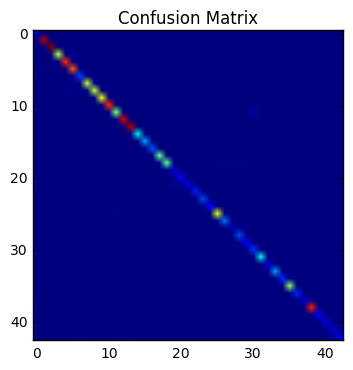

In [14]:
#Evaluate the model accuracy on validation dataset
from sklearn.metrics import confusion_matrix

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")    

    test_accuracy, test_loss, inference_data = evaluate(X_test_normalized, y_test_normalized)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))

    plt.title('Confusion Matrix')
    plt.imshow(confusion_matrix(y_true = y_test_normalized, y_pred = inference_data))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

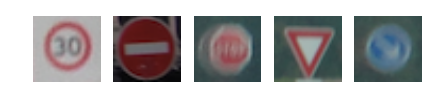

In [15]:
#Load the test images
import glob
import matplotlib.image as mpimg


plt_figure, plt_axis = plt.subplots(1, 5, figsize=(5, 2))
plt_figure.subplots_adjust(hspace = 0.2)
plt_axis = plt_axis.flatten()
my_test = []

for i, file_name in enumerate(glob.glob('./my_test_images/*.png')):
    image = cv2.imread(file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    plt_axis[i].axis('off')
    plt_axis[i].imshow(image)
    my_test.append(image)

### Predict the Sign Type for Each Image

In [25]:
#Pre-process (grayscale conversion, histogram equiv, normalization, reshape) the downloaded test images
X_my_test_updated = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in my_test])
X_my_test_updated = np.array([clahe.apply(image) for image in X_my_test_updated])
X_my_test_normalized = (np.array(X_my_test_updated, dtype=np.float32) - 128)/128
X_my_test_normalized = X_my_test_normalized[..., newaxis]

y_my_test_normalized = np.array([1, 17, 14, 13, 38])

### Analyze Performance

In [26]:
### Calculate the accuracy for these 5 new images. 

#run the predictions and visualize the result
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")    
    my_test_accuracy, my_test_loss, my_inference_data = evaluate(X_my_test_normalized, y_my_test_normalized)    
    #my_inference_output = sess.run(inference_operation, feed_dict={x: X_my_test_normalized})
    print("My Test Accuracy = {:.3f}".format(my_test_accuracy))
    
    print()
    print("My Test Labels: ", y_my_test_normalized.tolist())
    print("My Test Inferences: ", my_inference_data)
    
    print()
    for i in range(len(my_inference_data)):
        print("My Test Sign " + str(i+1) 
              + " - Actual: " + str(y_labels[y_my_test_normalized[i]])
              + ", Inferred: " + str(y_labels[my_inference_data[i]])
              )

My Test Accuracy = 0.800

My Test Labels:  [1, 17, 14, 13, 38]
My Test Inferences:  [  0.  17.  14.  13.  38.]

My Test Sign 1 - Actual: Speed limit (30km/h), Inferred: Speed limit (20km/h)
My Test Sign 2 - Actual: No entry, Inferred: No entry
My Test Sign 3 - Actual: Stop, Inferred: Stop
My Test Sign 4 - Actual: Yield, Inferred: Yield
My Test Sign 5 - Actual: Keep right, Inferred: Keep right


### Output Top 5 Softmax Probabilities For Each Image Found on the Web
For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

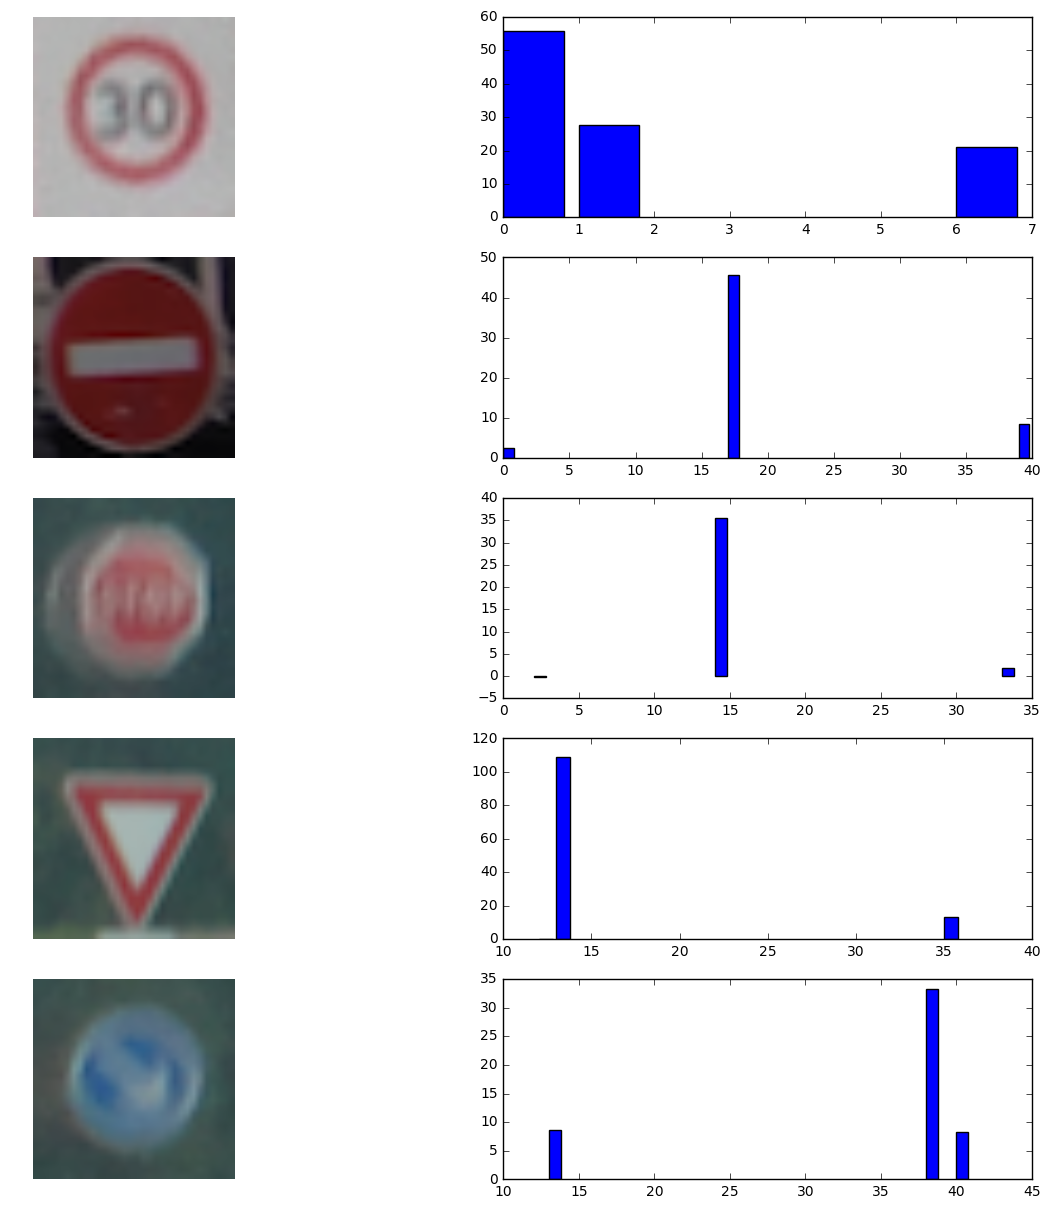

In [37]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

top_k_operation = tf.nn.top_k(logits, 3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver4 = tf.train.import_meta_graph('./lenet.meta')
    saver4.restore(sess, "./lenet")

    my_top_k = sess.run(top_k_operation, feed_dict={x: X_my_test_normalized})
    
    r = 5
    c = 2
    plt_figure, plt_axis = plt.subplots(r, c, figsize=(15, 15))
    plt_figure.subplots_adjust(hspace = 0.2)
    plt_axis = plt_axis.flatten()

    image_index = 0
    for i in range(0, r*c, 2):
        plt_axis[i].imshow(my_test[image_index])
        plt_axis[i].axis('off')
        plt_axis[i+1].bar(my_top_k.indices[image_index], my_top_k.values[image_index])
        
        image_index += 1

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 